# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import pycountry
from scipy.stats import linregress

# Get today's date
d = datetime.datetime.today()
date = d.strftime('%d-%m-%Y')
print(f"Today is {date}")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Today is 25-01-2020


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    countrycode = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    countryobj = pycountry.countries.get(alpha_2=countrycode.upper())
    country = countryobj.name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        # break at 600 so hopefully we have 500 that hit on the weather api
        if len(cities) == 600:
            break

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# initialize empty dataframe
cityWeatherDF = pd.DataFrame()

# loop through the cities list to get the information and append to main dataframe
for city, country in zip(cities,countries):
    response = requests.get(f"{query_url}{city},{country}").json()
    try:
        respDF = pd.DataFrame({"City":[city],
                               "Country":country,
                           "Cloudiness":response['clouds']['all'],
                           'Date':response['dt'],
                           'Humidity':response['main']['humidity'],
                           'Lat':response['coord']['lat'],
                           'Lng':response['coord']['lon'],
                           'Max Temp':response['main']['temp_max'],
                           'Wind Speed':response['wind']['speed']
                          })
        
        cityWeatherDF = cityWeatherDF.append(respDF, ignore_index=True)
        print(f"Done with {city},{country} number {cities.index(city) + 1} of {len(cities)}")
    except (KeyError):
        print(f"Can't find {city}, {country}. Skipping city")

Done with uvira,Congo, The Democratic Republic of the number 1 of 600
Done with east london,South Africa number 2 of 600
Done with upington,South Africa number 3 of 600
Done with sao joao da barra,Brazil number 4 of 600
Done with victoria,Seychelles number 5 of 600
Done with kudahuvadhoo,Maldives number 6 of 600
Done with tukrah,Libya number 7 of 600
Done with bengkulu,Indonesia number 8 of 600
Done with escanaba,United States number 9 of 600
Done with petropavl,Kazakhstan number 10 of 600
Done with provideniya,Russian Federation number 11 of 600
Done with padang,Indonesia number 12 of 600
Done with chalus,Iran, Islamic Republic of number 13 of 600
Done with muros,Spain number 14 of 600
Done with bull savanna,Jamaica number 15 of 600
Done with dunedin,New Zealand number 16 of 600
Done with souillac,Mauritius number 17 of 600
Done with port alfred,South Africa number 18 of 600
Done with rikitea,French Polynesia number 19 of 600
Done with hermanus,South Africa number 20 of 600
Done with 

Can't find lolua, Tuvalu. Skipping city
Done with mehamn,Norway number 171 of 600
Done with camargo,Bolivia, Plurinational State of number 172 of 600
Done with hithadhoo,Maldives number 173 of 600
Done with kruisfontein,South Africa number 174 of 600
Done with mackay,Australia number 175 of 600
Done with vangaindrano,Madagascar number 176 of 600
Done with sao lourenco do oeste,Brazil number 177 of 600
Done with dafeng,China number 178 of 600
Done with sitka,United States number 179 of 600
Done with kahului,United States number 180 of 600
Done with carnarvon,Australia number 181 of 600
Done with pringsewu,Indonesia number 182 of 600
Done with ribeira grande,Portugal number 183 of 600
Can't find mys shmidta, Russian Federation. Skipping city
Done with gat,Libya number 185 of 600
Done with hamilton,Bermuda number 186 of 600
Done with haines junction,Canada number 187 of 600
Done with juruti,Brazil number 188 of 600
Done with iracoubo,French Guiana number 189 of 600
Done with kiyasovo,Russ

Done with pangody,Russian Federation number 339 of 600
Can't find taburi, Philippines. Skipping city
Done with wicklow,Ireland number 341 of 600
Done with varhaug,Norway number 342 of 600
Done with codrington,Antigua and Barbuda number 343 of 600
Done with price,United States number 344 of 600
Done with saint george,United States number 345 of 600
Done with okahandja,Namibia number 346 of 600
Done with shahreza,Iran, Islamic Republic of number 347 of 600
Done with bosaso,Somalia number 348 of 600
Done with bubaque,Guinea-Bissau number 349 of 600
Done with omboue,Gabon number 350 of 600
Done with mangochi,Malawi number 351 of 600
Can't find mixtepec, Mexico. Skipping city
Done with santa isabel do rio negro,Brazil number 353 of 600
Done with moskovskiy,Tajikistan number 354 of 600
Can't find ngorongoro, Tanzania, United Republic of. Skipping city
Done with ambulu,Indonesia number 356 of 600
Done with kapuskasing,Canada number 357 of 600
Done with arraial do cabo,Brazil number 358 of 600

Done with smithers,Canada number 510 of 600
Can't find jiroft, Iran, Islamic Republic of. Skipping city
Done with mudgee,Australia number 512 of 600
Done with kempsey,Australia number 513 of 600
Done with jacareacanga,Brazil number 514 of 600
Done with namatanai,Papua New Guinea number 515 of 600
Done with da nang,Viet Nam number 516 of 600
Done with arlit,Niger number 517 of 600
Done with sawakin,Sudan number 518 of 600
Done with celestun,Mexico number 519 of 600
Done with acapulco,Mexico number 520 of 600
Done with mumford,Ghana number 521 of 600
Done with jaciara,Brazil number 522 of 600
Done with conceicao do araguaia,Brazil number 523 of 600
Done with bogotol,Russian Federation number 524 of 600
Done with moose factory,Canada number 525 of 600
Done with vostok,Russian Federation number 526 of 600
Done with flin flon,Canada number 527 of 600
Done with olafsvik,Iceland number 528 of 600
Done with pagudpud,Philippines number 529 of 600
Done with shimoda,Japan number 530 of 600
Done w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityWeatherDF.to_csv("Data/CityWeatherData.csv")
cityWeatherDF.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,uvira,"Congo, The Democratic Republic of the",100,1579983502,94,-3.41,29.14,52.81,1.05
1,east london,South Africa,0,1579983502,85,-33.02,27.91,77.31,0.51
2,upington,South Africa,0,1579983502,21,-28.45,21.26,84.20,4.70
3,sao joao da barra,Brazil,100,1579983502,85,-21.64,-41.05,74.79,8.05
4,victoria,Seychelles,100,1579983319,95,22.29,114.16,62.01,1.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Temperature vs. Latitude Plot

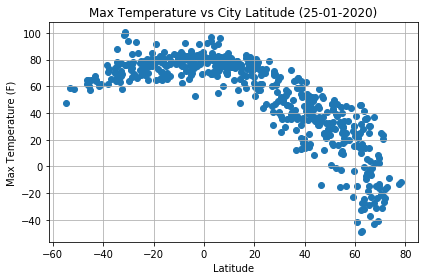

In [5]:
# set x and y values
lat = cityWeatherDF['Lat']
temp = cityWeatherDF['Max Temp']

# plot
plt.scatter(lat,temp)
# label the figure
plt.title(f"Max Temperature vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/MaxTemperatureVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Max Temperature of that city.
#### It shows that the closer to the equator the warmer the temperature is.  
#### Expecially in the northern hemisphere the temperature gets colder the further you get from the equator

#### Humidity vs. Latitude Plot

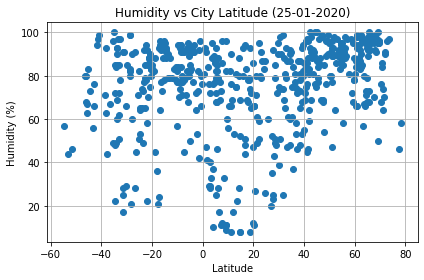

In [6]:
# set x and y values
humid = cityWeatherDF['Humidity']

# plot
plt.scatter(lat,humid)
# label the figure
plt.title(f"Humidity vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/HumidityVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Humidity of that city.
#### It shows that the closer to the equator the lower the humidity is overall.

#### Cloudiness vs. Latitude Plot

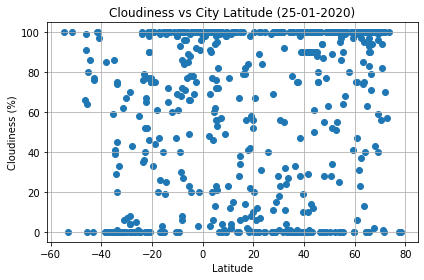

In [7]:
# set x and y values
cloud = cityWeatherDF['Cloudiness']

# plot
plt.scatter(lat,cloud)
# label the figure
plt.title(f"Cloudiness vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/CloudinessVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Cloudiness of that city.
#### There's not a lot that this plot shows.  
#### It mainly shows that latitude doesn't have a huge effect on cloudiness.

#### Wind Speed vs. Latitude Plot

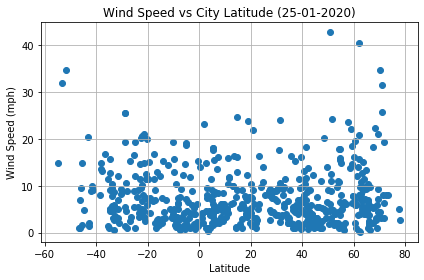

In [8]:
# set x and y values
windspd = cityWeatherDF['Wind Speed']

# plot
plt.scatter(lat,windspd)
# label the figure
plt.title(f"Wind Speed vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/WindSpeedVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Wind Speed of that city.
#### It shows that the closer to the equator the lower the wind speed is on average.
#### There are some extreme values in the northern latitudes

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregressplot(xvalues,yvalues,title,xlabel,ylabel):  
    
    # calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    rsqvalue = rvalue**2
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot scatter and linear regression
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")
    
    # annotate and label the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(min(xvalues) + 1,min(yvalues)+8),fontsize=12,color="red")
    plt.annotate(f"The r-squared is: {round(rsqvalue,4)}",(min(xvalues) + 1,min(yvalues)+1),fontsize=12,color="red")
    plt.grid()
    plt.tight_layout()
    print(f"The r-squared is {rsqvalue}")
    

In [10]:
# Create Northern and Southern Hemisphere DataFrames
cityWeatherNHemDF = cityWeatherDF[cityWeatherDF['Lat'] >= 0]
cityWeatherSHemDF = cityWeatherDF[cityWeatherDF['Lat'] < 0]
cityWeatherSHemDF.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,uvira,"Congo, The Democratic Republic of the",100,1579983502,94,-3.41,29.14,52.81,1.05
1,east london,South Africa,0,1579983502,85,-33.02,27.91,77.31,0.51
2,upington,South Africa,0,1579983502,21,-28.45,21.26,84.20,4.70
3,sao joao da barra,Brazil,100,1579983502,85,-21.64,-41.05,74.79,8.05
7,bengkulu,Indonesia,78,1579983387,91,-3.80,102.27,73.62,3.11


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.7486622711167925


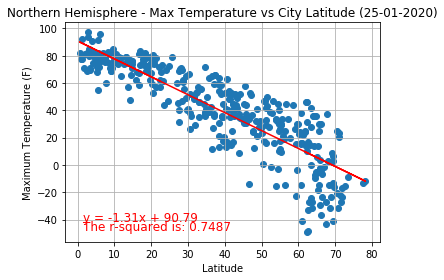

In [11]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Max Temp'],f"Northern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/NorthernHemisphereMaxTempVsCityLatitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.22588502015177134


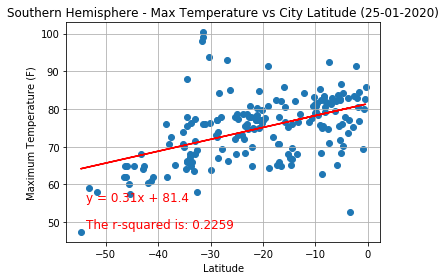

In [12]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Max Temp'],f"Southern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/SouthernHemisphereMaxTempVsCityLatitude.png")

### Summary
#### The trends in the northern hemisphere are more pronounced than those in the southern hemisphere
#### In both hemispheres the closer to the equator the warmer it is

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.22197254014264564


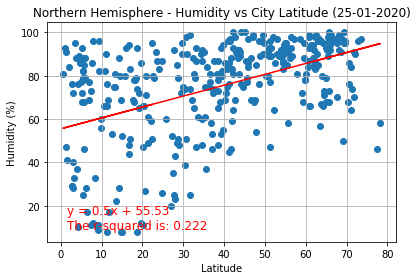

In [13]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Humidity'],f"Northern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/NorthernHemisphereHumidityVsCityLatitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.048253306307854626


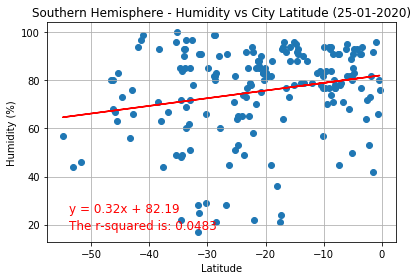

In [14]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Humidity'],f"Southern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/SouthernHemisphereHumidityVsCityLatitude.png")

### Summary
#### There was not a pronounced relationship in either hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.03395962741819096


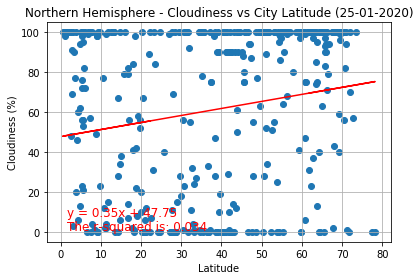

In [15]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/NorthernHemisphereCloudinessVsCityLatitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.1055333607252299


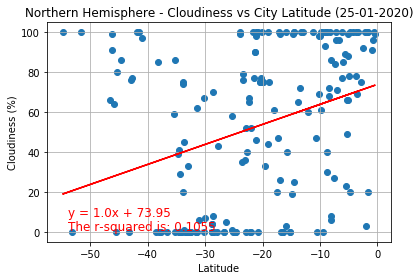

In [16]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/SouthernHemisphereCloudinessVsCityLatitude.png")

### Summary
#### There is not a pronounced relationship in either hemisphere
#### On average the more north you go in either hemisphere the more cloudy it is

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.008316351742962828


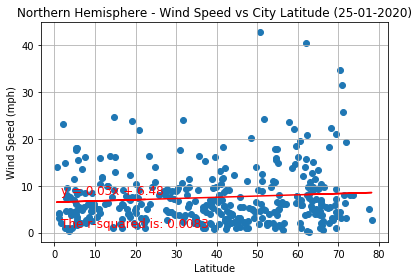

In [17]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/NorthernHemisphereWindSpeedVsCityLatitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.06884308506535472


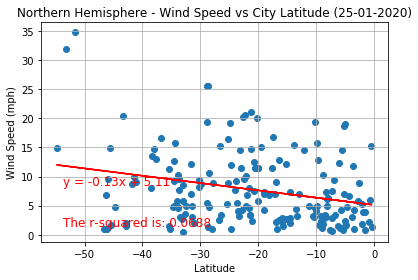

In [18]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/SouthernHemisphereWindSpeedVsCityLatitude.png")

### Summary
#### The farther from the equator the higher the average wind speed
#### There are some outliers around -55 and 70 degrees latitude


# Oberservations

### The closer to the equator the latitude is the higher the average temperature is in most cities
### The above trend is more prominent in the northern hemisphere
### The closer to the equator the higher the humidity is in most cities
### Of the four weather characteristics investigated, temperature had the highest correlation to latitude